## Sentiment Classification Using SVM on COVID-19 Dataset 

In [1]:
#Importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
import re
import preprocessor as p
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score

In [2]:
#Loading the dataset on to a varaible 
df=pd.read_csv(r"D:\DIGITAL SEM 3\Deep learning\COVIDSenti-A.csv")

In [3]:
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


#### The dataset contains a 'tweet' Column and 'label' column. The label column is a categorical column with values neutral- 'neu', positive-'pos' and negative-'neg'.

In [4]:
df.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [6]:
#TO get the count of the neg, pos and neu
df['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

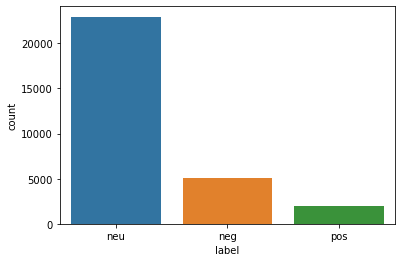

In [7]:
#count plot of the label column
sn.countplot(df['label'])

#### tweet-preprocessor module can be used to clean all the undesired characters in the tweet. It can be used to clean emoticons, special character and other short forms that are used to express the feelings of the users in twitter.

In [8]:
#!pip install tweet-preprocessor

In [9]:
# remove special characters using the regular expression library
#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

#### A function for cleaning the tweet column in the dataset. This function will also convert the words into lower form for better anlaysis

In [10]:
# costum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
    arr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        arr.append(tmpL)
    return arr

In [11]:
#calling the clean functions to clean the tweet column
cleaned_tweet = clean_tweets(df["tweet"])
cleaned_tweet = pd.DataFrame(cleaned_tweet)


In [12]:
cleaned_tweet

,0
0,coronavirus human coronavirus types cdc
1,thats true corona virus swine flue bird flu i...
2,tldr not sars possibly new coronavirus difficu...
3,disease outbreak news from the who middle east...
4,china media wsj says sources tell them myste...
...,...
29995,cdc re test confirms westerdam cruise ship pas...
29996,two doctors die of coronavirus within hours in...
29997,beijing the lockdown of guo jings neighbourh...
29998,in a route to spread from to


In [13]:
# append cleaned tweets to the training data
df["cleaned_tweet"] = cleaned_tweet

# compare the cleaned and uncleaned tweets
df.head(10)

,tweet,label,cleaned_tweet
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu,coronavirus human coronavirus types cdc
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu,thats true corona virus swine flue bird flu i...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg,tldr not sars possibly new coronavirus difficu...
3,Disease outbreak news from the WHO: Middle Eas...,neu,disease outbreak news from the who middle east...
4,China - Media: WSJ says sources tell them myst...,neu,china media wsj says sources tell them myste...
5,The mystery new virus causing #China pneumonia...,neu,the mystery new virus causing pneumonia outbre...
6,Virologists weigh in on novel coronavirus in C...,neu,virologists weigh in on novel coronavirus in c...
7,"""Chinese authorities have made a preliminary d...",neu,chinese authorities have made a preliminary de...
8,@tezuma75 Why #CCP keep on saying unknown caus...,neg,why keep on saying unknown cause of pneumonia ...
9,Chinese report says mysterious illnesses may b...,neu,chinese report says mysterious illnesses may b...


In [14]:
#Performing the test-train split and the ratio taken is 70:30
y=df.label.values
x=df.cleaned_tweet.values
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=7,test_size=0.3,shuffle=True)

In [15]:
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [16]:
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

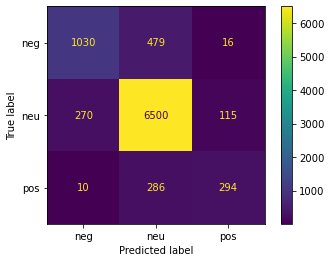

In [17]:
#confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

In [18]:
#Printing the classification report to see all the values of the metrics
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_svm))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         neg       0.79      0.68      0.73      1525
         neu       0.89      0.94      0.92      6885
         pos       0.69      0.50      0.58       590

    accuracy                           0.87      9000
   macro avg       0.79      0.71      0.74      9000
weighted avg       0.86      0.87      0.86      9000



In [19]:
#Accuracy of the model
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  86.93333333333332 %


### Accuracy of the model is found to 86.933%(~87)%